# Homework 5


Apply the EDA techniques we learnt today to `flights` dataset and write a short report.

# Loading Data Set & Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


#url = 'https://raw.githubusercontent.com/msaricaumbc/DS_data/master/nyc_flights.csv'
#flights = pd.read_csv(url)


In [2]:
flights = pd.read_csv("https://raw.githubusercontent.com/msaricaumbc/DS_data/master/nyc_flights.csv",parse_dates=True)

In [3]:
flights.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01T10:00:00Z
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01T10:00:00Z
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01T10:00:00Z
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01T10:00:00Z
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01T11:00:00Z


In [4]:
flights.shape

(336776, 19)

In [5]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   year            336776 non-null  int64  
 1   month           336776 non-null  int64  
 2   day             336776 non-null  int64  
 3   dep_time        328521 non-null  float64
 4   sched_dep_time  336776 non-null  int64  
 5   dep_delay       328521 non-null  float64
 6   arr_time        328063 non-null  float64
 7   sched_arr_time  336776 non-null  int64  
 8   arr_delay       327346 non-null  float64
 9   carrier         336776 non-null  object 
 10  flight          336776 non-null  int64  
 11  tailnum         334264 non-null  object 
 12  origin          336776 non-null  object 
 13  dest            336776 non-null  object 
 14  air_time        327346 non-null  float64
 15  distance        336776 non-null  int64  
 16  hour            336776 non-null  int64  
 17  minute    

# Checking For Null Values in the columns

In [6]:
flights['year'].isna().values.any()

False

### In dep_time Null values are replacing by sched_dep_time

In [7]:
flights['dep_time'].isna().values.any()

True

In [8]:
flights.loc[flights['dep_time'].isna()]

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
838,2013,1,1,NaN,1630,NaN,NaN,1815,NaN,EV,4308,N18120,EWR,RDU,NaN,416,16,30,2013-01-01T21:00:00Z
839,2013,1,1,NaN,1935,NaN,NaN,2240,NaN,AA,791,N3EHAA,LGA,DFW,NaN,1389,19,35,2013-01-02T00:00:00Z
840,2013,1,1,NaN,1500,NaN,NaN,1825,NaN,AA,1925,N3EVAA,LGA,MIA,NaN,1096,15,0,2013-01-01T20:00:00Z
841,2013,1,1,NaN,600,NaN,NaN,901,NaN,B6,125,N618JB,JFK,FLL,NaN,1069,6,0,2013-01-01T11:00:00Z
1777,2013,1,2,NaN,1540,NaN,NaN,1747,NaN,EV,4352,N10575,EWR,CVG,NaN,569,15,40,2013-01-02T20:00:00Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336771,2013,9,30,NaN,1455,NaN,NaN,1634,NaN,9E,3393,NaN,JFK,DCA,NaN,213,14,55,2013-09-30T18:00:00Z
336772,2013,9,30,NaN,2200,NaN,NaN,2312,NaN,9E,3525,NaN,LGA,SYR,NaN,198,22,0,2013-10-01T02:00:00Z
336773,2013,9,30,NaN,1210,NaN,NaN,1330,NaN,MQ,3461,N535MQ,LGA,BNA,NaN,764,12,10,2013-09-30T16:00:00Z
336774,2013,9,30,NaN,1159,NaN,NaN,1344,NaN,MQ,3572,N511MQ,LGA,CLE,NaN,419,11,59,2013-09-30T15:00:00Z


In [9]:
flights['sched_dep_time'].isna().values.any()

False

In [10]:
flights.dep_time.fillna(flights.sched_dep_time, inplace=True)

In [11]:
flights[ ['dep_time','sched_dep_time']]

,dep_time,sched_dep_time
0,517.0,515
1,533.0,529
2,542.0,540
3,544.0,545
4,554.0,600
...,...,...
336771,1455.0,1455
336772,2200.0,2200
336773,1210.0,1210
336774,1159.0,1159


In [12]:
flights['dep_time'].isna().values.any()

False

### In dep_delay Null values are replacing by 0

In [13]:
flights['dep_delay'].isna().values.any()

True

In [14]:
flights.loc[flights['dep_delay'].isna()]

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
838,2013,1,1,1630.0,1630,NaN,NaN,1815,NaN,EV,4308,N18120,EWR,RDU,NaN,416,16,30,2013-01-01T21:00:00Z
839,2013,1,1,1935.0,1935,NaN,NaN,2240,NaN,AA,791,N3EHAA,LGA,DFW,NaN,1389,19,35,2013-01-02T00:00:00Z
840,2013,1,1,1500.0,1500,NaN,NaN,1825,NaN,AA,1925,N3EVAA,LGA,MIA,NaN,1096,15,0,2013-01-01T20:00:00Z
841,2013,1,1,600.0,600,NaN,NaN,901,NaN,B6,125,N618JB,JFK,FLL,NaN,1069,6,0,2013-01-01T11:00:00Z
1777,2013,1,2,1540.0,1540,NaN,NaN,1747,NaN,EV,4352,N10575,EWR,CVG,NaN,569,15,40,2013-01-02T20:00:00Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336771,2013,9,30,1455.0,1455,NaN,NaN,1634,NaN,9E,3393,NaN,JFK,DCA,NaN,213,14,55,2013-09-30T18:00:00Z
336772,2013,9,30,2200.0,2200,NaN,NaN,2312,NaN,9E,3525,NaN,LGA,SYR,NaN,198,22,0,2013-10-01T02:00:00Z
336773,2013,9,30,1210.0,1210,NaN,NaN,1330,NaN,MQ,3461,N535MQ,LGA,BNA,NaN,764,12,10,2013-09-30T16:00:00Z
336774,2013,9,30,1159.0,1159,NaN,NaN,1344,NaN,MQ,3572,N511MQ,LGA,CLE,NaN,419,11,59,2013-09-30T15:00:00Z


In [15]:
flights.dep_delay.fillna(0, inplace=True)

In [16]:
flights['dep_delay'].isna().values.any()

False

In [17]:
flights["dep_delay"]

0         2.0
1         4.0
2         2.0
3        -1.0
4        -6.0
         ... 
336771    0.0
336772    0.0
336773    0.0
336774    0.0
336775    0.0
Name: dep_delay, Length: 336776, dtype: float64

###  In arr_time Null values are replacing by sched_arr_time

In [18]:
flights['arr_time'].isna().values.any()

True

In [19]:
flights.loc[flights['arr_time'].isna()]

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
754,2013,1,1,2016.0,1930,46.0,NaN,2220,NaN,EV,4204,N14168,EWR,OKC,NaN,1325,19,30,2013-01-02T00:00:00Z
838,2013,1,1,1630.0,1630,0.0,NaN,1815,NaN,EV,4308,N18120,EWR,RDU,NaN,416,16,30,2013-01-01T21:00:00Z
839,2013,1,1,1935.0,1935,0.0,NaN,2240,NaN,AA,791,N3EHAA,LGA,DFW,NaN,1389,19,35,2013-01-02T00:00:00Z
840,2013,1,1,1500.0,1500,0.0,NaN,1825,NaN,AA,1925,N3EVAA,LGA,MIA,NaN,1096,15,0,2013-01-01T20:00:00Z
841,2013,1,1,600.0,600,0.0,NaN,901,NaN,B6,125,N618JB,JFK,FLL,NaN,1069,6,0,2013-01-01T11:00:00Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336771,2013,9,30,1455.0,1455,0.0,NaN,1634,NaN,9E,3393,NaN,JFK,DCA,NaN,213,14,55,2013-09-30T18:00:00Z
336772,2013,9,30,2200.0,2200,0.0,NaN,2312,NaN,9E,3525,NaN,LGA,SYR,NaN,198,22,0,2013-10-01T02:00:00Z
336773,2013,9,30,1210.0,1210,0.0,NaN,1330,NaN,MQ,3461,N535MQ,LGA,BNA,NaN,764,12,10,2013-09-30T16:00:00Z
336774,2013,9,30,1159.0,1159,0.0,NaN,1344,NaN,MQ,3572,N511MQ,LGA,CLE,NaN,419,11,59,2013-09-30T15:00:00Z


In [20]:
flights.arr_time.fillna(flights.sched_arr_time, inplace=True)

In [21]:
flights[["arr_time","sched_arr_time"]]

,arr_time,sched_arr_time
0,830.0,819
1,850.0,830
2,923.0,850
3,1004.0,1022
4,812.0,837
...,...,...
336771,1634.0,1634
336772,2312.0,2312
336773,1330.0,1330
336774,1344.0,1344


### In arr_delay Null values are replacing by 0

In [22]:
flights.arr_delay.fillna(0, inplace=True)

In [23]:
flights[["arr_delay"]]

,arr_delay
0,11.0
1,20.0
2,33.0
3,-18.0
4,-25.0
...,...
336771,0.0
336772,0.0
336773,0.0
336774,0.0


In [24]:
flights.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01T10:00:00Z
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01T10:00:00Z
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01T10:00:00Z
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01T10:00:00Z
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01T11:00:00Z


### Checkinh each Columns For null values

In [25]:
flights['carrier'].isna().values.any()

False

In [26]:
flights['flight'].isna().values.any()

False

### If Tailnum having a Null values then removing the entire row because tailnum is unique

In [27]:
flights['tailnum'].isna().values.any()

True

In [28]:
flights.loc[flights['tailnum'].isna()]

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
1782,2013,1,2,1545.0,1545,0.0,1910.0,1910,0.0,AA,133,NaN,JFK,LAX,NaN,2475,15,45,2013-01-02T20:00:00Z
1784,2013,1,2,1601.0,1601,0.0,1735.0,1735,0.0,UA,623,NaN,EWR,ORD,NaN,719,16,1,2013-01-02T21:00:00Z
2697,2013,1,3,857.0,857,0.0,1209.0,1209,0.0,UA,714,NaN,EWR,MIA,NaN,1085,8,57,2013-01-03T13:00:00Z
2698,2013,1,3,645.0,645,0.0,952.0,952,0.0,UA,719,NaN,EWR,DFW,NaN,1372,6,45,2013-01-03T11:00:00Z
3608,2013,1,4,845.0,845,0.0,1015.0,1015,0.0,9E,3405,NaN,JFK,DCA,NaN,213,8,45,2013-01-04T13:00:00Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334186,2013,9,27,1600.0,1600,0.0,1739.0,1739,0.0,UA,269,NaN,LGA,ORD,NaN,733,16,0,2013-09-27T20:00:00Z
334868,2013,9,28,1635.0,1635,0.0,1827.0,1827,0.0,US,581,NaN,EWR,CLT,NaN,529,16,35,2013-09-28T20:00:00Z
335782,2013,9,29,700.0,700,0.0,833.0,833,0.0,UA,331,NaN,LGA,ORD,NaN,733,7,0,2013-09-29T11:00:00Z
336771,2013,9,30,1455.0,1455,0.0,1634.0,1634,0.0,9E,3393,NaN,JFK,DCA,NaN,213,14,55,2013-09-30T18:00:00Z


In [29]:
flights

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01T10:00:00Z
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01T10:00:00Z
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01T10:00:00Z
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01T10:00:00Z
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01T11:00:00Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336771,2013,9,30,1455.0,1455,0.0,1634.0,1634,0.0,9E,3393,NaN,JFK,DCA,NaN,213,14,55,2013-09-30T18:00:00Z
336772,2013,9,30,2200.0,2200,0.0,2312.0,2312,0.0,9E,3525,NaN,LGA,SYR,NaN,198,22,0,2013-10-01T02:00:00Z
336773,2013,9,30,1210.0,1210,0.0,1330.0,1330,0.0,MQ,3461,N535MQ,LGA,BNA,NaN,764,12,10,2013-09-30T16:00:00Z
336774,2013,9,30,1159.0,1159,0.0,1344.0,1344,0.0,MQ,3572,N511MQ,LGA,CLE,NaN,419,11,59,2013-09-30T15:00:00Z


In [30]:
flights['origin'].isna().values.any()

False

In [31]:
flights['dest'].isna().values.any()

False

In [32]:
flights['distance'].isna().values.any()

False

In [33]:
flights['time_hour'].isna().values.any()

False

In [34]:
flights['minute'].isna().values.any()

False

In [35]:
flights['hour'].isna().values.any()

False

In [36]:
flights['air_time'].isna().values.any()

True

In [37]:
flights.loc[flights['air_time'].isna()]

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
471,2013,1,1,1525.0,1530,-5.0,1934.0,1805,0.0,MQ,4525,N719MQ,LGA,XNA,NaN,1147,15,30,2013-01-01T20:00:00Z
477,2013,1,1,1528.0,1459,29.0,2002.0,1647,0.0,EV,3806,N17108,EWR,STL,NaN,872,14,59,2013-01-01T19:00:00Z
615,2013,1,1,1740.0,1745,-5.0,2158.0,2020,0.0,MQ,4413,N739MQ,LGA,XNA,NaN,1147,17,45,2013-01-01T22:00:00Z
643,2013,1,1,1807.0,1738,29.0,2251.0,2103,0.0,UA,1228,N31412,EWR,SAN,NaN,2425,17,38,2013-01-01T22:00:00Z
725,2013,1,1,1939.0,1840,59.0,29.0,2151,0.0,9E,3325,N905XJ,JFK,DFW,NaN,1391,18,40,2013-01-01T23:00:00Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336771,2013,9,30,1455.0,1455,0.0,1634.0,1634,0.0,9E,3393,NaN,JFK,DCA,NaN,213,14,55,2013-09-30T18:00:00Z
336772,2013,9,30,2200.0,2200,0.0,2312.0,2312,0.0,9E,3525,NaN,LGA,SYR,NaN,198,22,0,2013-10-01T02:00:00Z
336773,2013,9,30,1210.0,1210,0.0,1330.0,1330,0.0,MQ,3461,N535MQ,LGA,BNA,NaN,764,12,10,2013-09-30T16:00:00Z
336774,2013,9,30,1159.0,1159,0.0,1344.0,1344,0.0,MQ,3572,N511MQ,LGA,CLE,NaN,419,11,59,2013-09-30T15:00:00Z


In [38]:
flights

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01T10:00:00Z
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01T10:00:00Z
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01T10:00:00Z
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01T10:00:00Z
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01T11:00:00Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336771,2013,9,30,1455.0,1455,0.0,1634.0,1634,0.0,9E,3393,NaN,JFK,DCA,NaN,213,14,55,2013-09-30T18:00:00Z
336772,2013,9,30,2200.0,2200,0.0,2312.0,2312,0.0,9E,3525,NaN,LGA,SYR,NaN,198,22,0,2013-10-01T02:00:00Z
336773,2013,9,30,1210.0,1210,0.0,1330.0,1330,0.0,MQ,3461,N535MQ,LGA,BNA,NaN,764,12,10,2013-09-30T16:00:00Z
336774,2013,9,30,1159.0,1159,0.0,1344.0,1344,0.0,MQ,3572,N511MQ,LGA,CLE,NaN,419,11,59,2013-09-30T15:00:00Z


In [39]:
Cleaned_flights = flights.dropna(how='any')

In [40]:
Cleaned_flights

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01T10:00:00Z
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01T10:00:00Z
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01T10:00:00Z
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01T10:00:00Z
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01T11:00:00Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336765,2013,9,30,2240.0,2245,-5.0,2334.0,2351,-17.0,B6,1816,N354JB,JFK,SYR,41.0,209,22,45,2013-10-01T02:00:00Z
336766,2013,9,30,2240.0,2250,-10.0,2347.0,7,-20.0,B6,2002,N281JB,JFK,BUF,52.0,301,22,50,2013-10-01T02:00:00Z
336767,2013,9,30,2241.0,2246,-5.0,2345.0,1,-16.0,B6,486,N346JB,JFK,ROC,47.0,264,22,46,2013-10-01T02:00:00Z
336768,2013,9,30,2307.0,2255,12.0,2359.0,2358,1.0,B6,718,N565JB,JFK,BOS,33.0,187,22,55,2013-10-01T02:00:00Z


In [41]:
Cleaned_flights.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 327346 entries, 0 to 336769
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   year            327346 non-null  int64  
 1   month           327346 non-null  int64  
 2   day             327346 non-null  int64  
 3   dep_time        327346 non-null  float64
 4   sched_dep_time  327346 non-null  int64  
 5   dep_delay       327346 non-null  float64
 6   arr_time        327346 non-null  float64
 7   sched_arr_time  327346 non-null  int64  
 8   arr_delay       327346 non-null  float64
 9   carrier         327346 non-null  object 
 10  flight          327346 non-null  int64  
 11  tailnum         327346 non-null  object 
 12  origin          327346 non-null  object 
 13  dest            327346 non-null  object 
 14  air_time        327346 non-null  float64
 15  distance        327346 non-null  int64  
 16  hour            327346 non-null  int64  
 17  minute    

### Sanity Check by using min and max

In [45]:
Cleaned_flights["dep_time"].min()

1.0

In [48]:
Cleaned_flights["dep_time"].max()

2400.0

In [47]:
Cleaned_flights["sched_dep_time"].max()

2359

In [50]:
Cleaned_flights["arr_time"].min()

1.0

In [51]:
Cleaned_flights["arr_time"].max()

2400.0

In [52]:
Cleaned_flights["sched_arr_time"].max()

2359

In [53]:
Cleaned_flights["sched_arr_time"].min()

1

In [56]:
Cleaned_flights.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 327346 entries, 0 to 336769
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   year            327346 non-null  int64  
 1   month           327346 non-null  int64  
 2   day             327346 non-null  int64  
 3   dep_time        327346 non-null  float64
 4   sched_dep_time  327346 non-null  int64  
 5   dep_delay       327346 non-null  float64
 6   arr_time        327346 non-null  float64
 7   sched_arr_time  327346 non-null  int64  
 8   arr_delay       327346 non-null  float64
 9   carrier         327346 non-null  object 
 10  flight          327346 non-null  int64  
 11  tailnum         327346 non-null  object 
 12  origin          327346 non-null  object 
 13  dest            327346 non-null  object 
 14  air_time        327346 non-null  float64
 15  distance        327346 non-null  int64  
 16  hour            327346 non-null  int64  
 17  minute    

<AxesSubplot:>

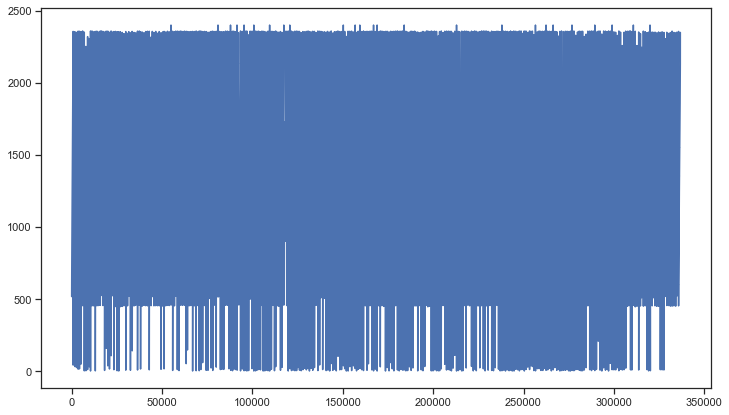

In [79]:
Cleaned_flights['dep_time'].plot()

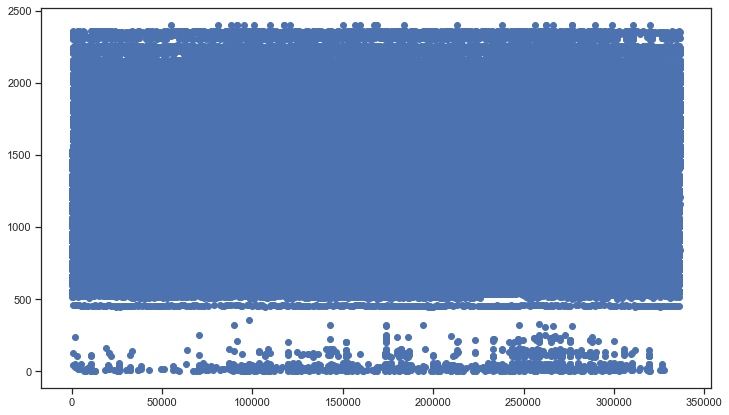

In [81]:
plt.scatter(flights['dep_time'].index, ser)
plt.show()

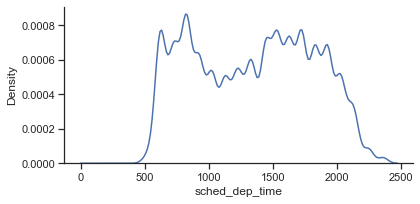

In [83]:
plot = sns.displot(data = flights, x= 'sched_dep_time', kind = 'kde', height= 3, aspect = 2)

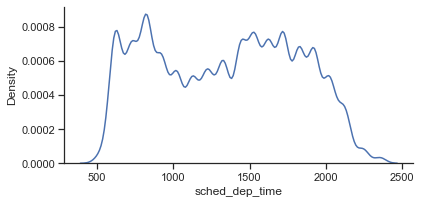

In [84]:
plot = sns.displot(data = Cleaned_flights, x= 'sched_dep_time', kind = 'kde', height= 3, aspect = 2)

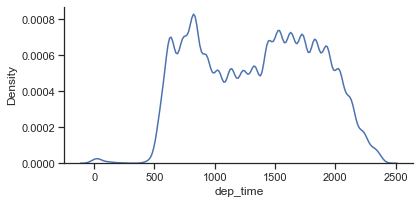

In [69]:
plot = sns.displot(data = flights, x= 'dep_time', kind = 'kde', height= 3, aspect = 2)

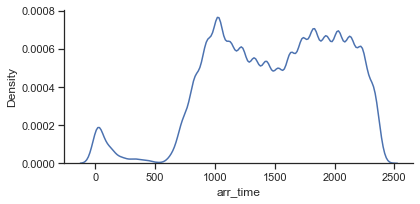

In [73]:
plot = sns.displot(data = flights, x= 'arr_time', kind = 'kde', height= 3, aspect = 2)

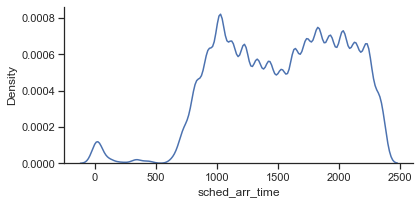

In [74]:
plot = sns.displot(data = flights, x= 'sched_arr_time', kind = 'kde', height= 3, aspect = 2)

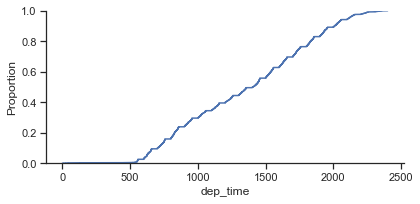

In [71]:
plot = sns.displot(data = flights, x= 'dep_time', kind = 'ecdf', height= 3, aspect = 2)

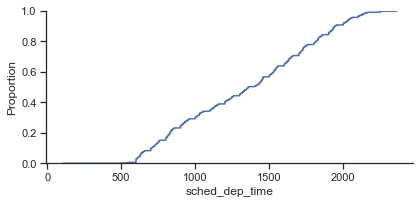

In [72]:
plot = sns.displot(data = flights, x= 'sched_dep_time', kind = 'ecdf', height= 3, aspect = 2)

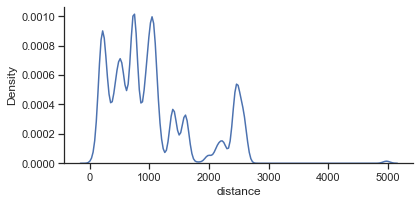

In [78]:
plot = sns.displot(data = flights, x= 'distance', kind = 'kde', height= 3, aspect = 2)

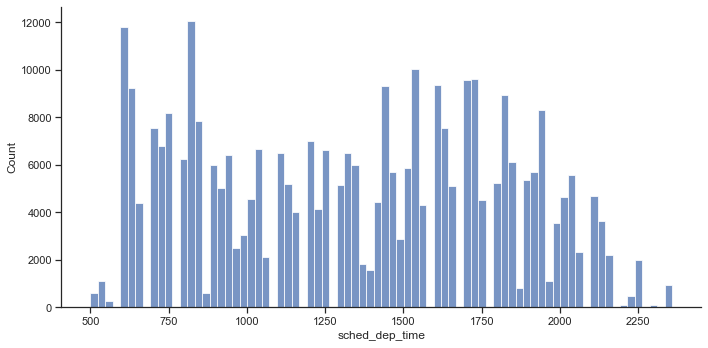

In [87]:
sns.displot(Cleaned_flights, x='sched_dep_time', kind='hist', aspect=2)

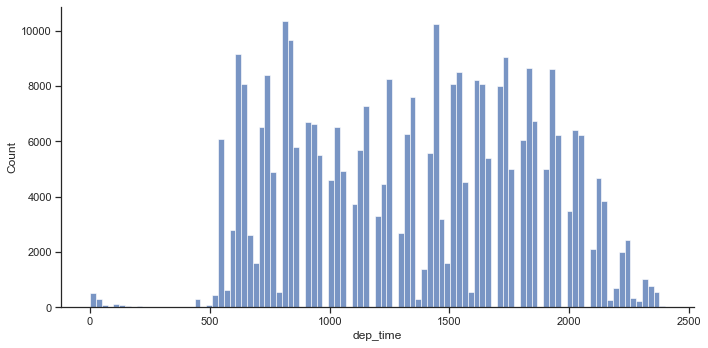

In [88]:
sns.displot(Cleaned_flights, x='dep_time', kind='hist', aspect=2)

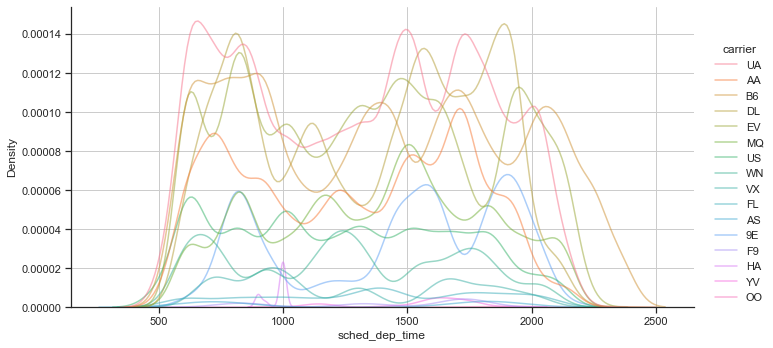

In [91]:
plot= sns.displot(data=Cleaned_flights, kind="kde", x="sched_dep_time", hue = 'carrier', aspect=2, alpha=0.5)
plot.ax.grid()